In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df_articles = pd.read_excel('date_preproc2.xlsx')
df_articles.head()

,date,title,link,annotation,authors,text,UDK,ESCI,GeoRef,ВАК,-,RSCI,WOS,AGRIS,PubMed,MathSciNet,Scopus,zbMATH,CAS,count_words
0,2019,Проблема обработки данных георадиолокационных ...,/article/n/problema-obrabotki-dannyh-georadiol...,в статье рассматривается проблема обработки да...,Поротова Варвара Петровна,﻿GEOLOGICAL AND MINERALOGICAL SCIENCES\nTHE PR...,NaN,0,0,0,1,0,0,0,0,0,0,0,0,776
1,2019,Understanding and designing modern high-reliab...,/article/n/understanding-and-designing-modern-...,the purpose of this paper is to describe as Sp...,"Zemtsov Andrey Nikolaevich, Tran Dung Khanh",﻿TECHNICAL SCIENCES\nUNDERSTANDING AND DESIGNI...,NaN,0,0,0,1,0,0,0,0,0,0,0,0,1421
2,2019,разработка аутентификационной модели для обл...,/article/n/razrabotka-autentifikatsionnoi-mode...,рассмотрены методы и модели безопасного исполь...,"Вишняков Александр Сергеевич, Макаров Анатолии...",﻿DEVELOPMENT OF AUTHENTICATION MODEL FOR CLOUD...,УДК 331.225.3,0,0,0,1,0,0,0,0,0,0,0,0,2719
3,2019,Разработка модели информационных потоков в сис...,/article/n/razrabotka-modeli-informatsionnyh-p...,в данной работе представлена модель информаци...,Жуков Алексей Викторович,﻿DEVELOPMENT OF A MODEL OF INFORMATION FLOWS I...,NaN,0,0,0,1,0,0,0,0,0,0,0,0,2256
4,2019,Автоматизированная система управления солнечны...,/article/n/avtomatizirovannaya-sistema-upravle...,в данной статье рассмотрена возможность приме...,Зеленцов Денис Сергеевич,﻿AUTOMATED CONTROL SYSTEM OF THE SOLAR AIR MAN...,NaN,0,0,0,1,0,0,0,0,0,0,0,0,1132


1. В какие годы чаще всего писали статьи в этой выборке?

In [ ]:
df_articles

In [12]:
sorted(df_articles['date'].unique())

[1967,
 1973,
 1990,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022,
 2023,
 2024]

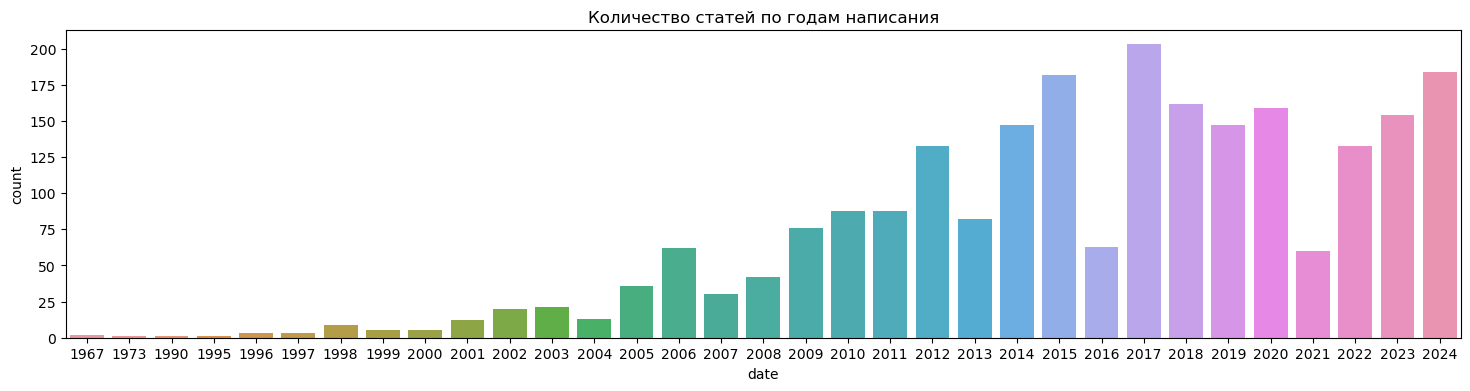

In [13]:
plt.figure(figsize=[18,4])
sns.countplot(data=df_articles, x='date', order=[1967, 1973, 1990, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 
              2004, 2005, 2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024] )
plt.title('Количество статей по годам написания')
plt.show()

Видим, что чем раньше был год, тем меньше статей написано. Вполне правдоподобно, вряд ли многие авторы, писавшие статьи полвека назад, озаботились их переносом на сайт киберленинки.

Ближе к текущим дням больше всего статей было написано в 2017, 2015 и 2024.

2. Какая взаимосвязь между длиной статьи и годом написания?

[Text(0, 0, '2938'),
 Text(0, 0, '2914'),
 Text(0, 0, '2493.5'),
 Text(0, 0, '2478'),
 Text(0, 0, '2434.5'),
 Text(0, 0, '2406.5'),
 Text(0, 0, '2374'),
 Text(0, 0, '2298'),
 Text(0, 0, '2276'),
 Text(0, 0, '2076.5'),
 Text(0, 0, '2061'),
 Text(0, 0, '2025'),
 Text(0, 0, '2009.5'),
 Text(0, 0, '2001'),
 Text(0, 0, '1975.5'),
 Text(0, 0, '1944.5'),
 Text(0, 0, '1914.5'),
 Text(0, 0, '1912'),
 Text(0, 0, '1856.5'),
 Text(0, 0, '1844'),
 Text(0, 0, '1810.5'),
 Text(0, 0, '1776'),
 Text(0, 0, '1751.5'),
 Text(0, 0, '1747'),
 Text(0, 0, '1463'),
 Text(0, 0, '1433'),
 Text(0, 0, '1396'),
 Text(0, 0, '1336'),
 Text(0, 0, '1179'),
 Text(0, 0, '1067'),
 Text(0, 0, '608'),
 Text(0, 0, '396'),
 Text(0, 0, '267')]

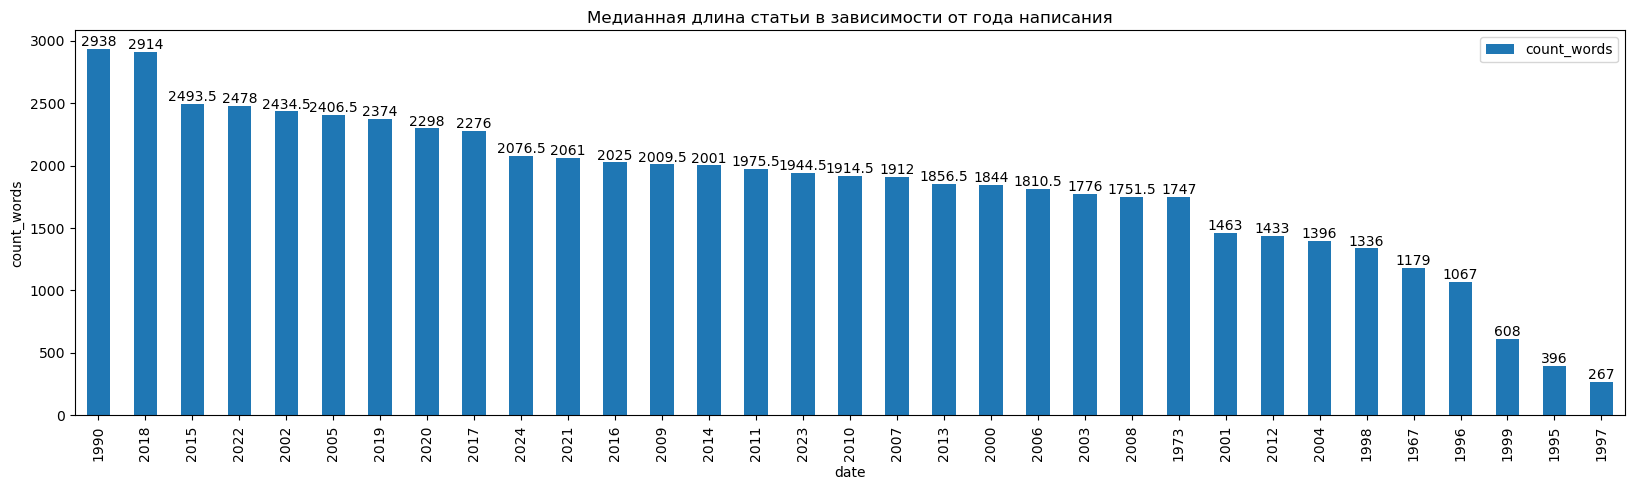

In [16]:
top_salary = df_articles[['count_words', 'date']].groupby('date').median().sort_values('count_words', ascending=False)
ax = top_salary.plot(kind='bar', title='Медианная длина статьи в зависимости от года написания',
                             xlabel='date',
                             ylabel='count_words',
                             figsize=[20,5])
ax.bar_label(ax.containers[0])

Самые длинные статьи писали в 1990 и 2018 годах.

В каких журналах больше всего публиковались?

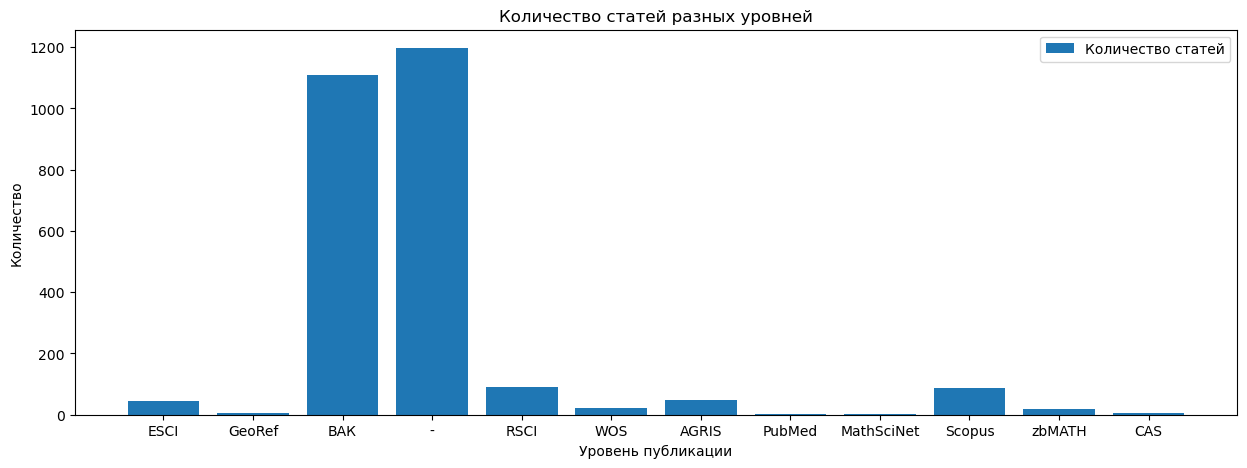

In [21]:
x = ['ESCI','GeoRef','ВАК','-','RSCI','WOS','AGRIS','PubMed','MathSciNet','Scopus','zbMATH','CAS']
y = [df_articles['ESCI'].sum(), df_articles['GeoRef'].sum(), df_articles['ВАК'].sum(),df_articles['-'].sum(), 
     df_articles['RSCI'].sum(), df_articles['WOS'].sum(), df_articles['AGRIS'].sum(), df_articles['PubMed'].sum(),
     df_articles['MathSciNet'].sum(),  df_articles['Scopus'].sum(),  df_articles['zbMATH'].sum(),  df_articles['CAS'].sum()]
plt.figure(figsize=(15,5))
plt.bar(x, y, label='Количество статей')
plt.xlabel('Уровень публикации')
plt.ylabel('Количество')
plt.title('Количество статей разных уровней')
plt.legend()

Больше всего статей в ВАК и без указания уровня. Меньше всего статей в узких областях, GeoRef (геология), PubMed(медицина) и т.д. Вполне объяснимо, учитывая, что я исследую данные на разделе "компьютерные и информационные науки"

Как взаимосвязаны уровни публикации статей?

In [22]:
for_heatmap = df_articles[['ESCI','GeoRef','ВАК','-','RSCI','WOS','AGRIS','PubMed','MathSciNet','Scopus','zbMATH','CAS']]
for_heatmap

,ESCI,GeoRef,ВАК,-,RSCI,WOS,AGRIS,PubMed,MathSciNet,Scopus,zbMATH,CAS
0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2322,0,0,1,0,0,0,0,0,0,0,0,0
2323,0,0,1,0,0,0,0,0,0,0,0,0
2324,0,0,1,0,0,0,0,0,0,0,0,0
2325,0,0,1,0,0,0,0,0,0,0,0,0


In [23]:
for_heatmap.corr()

,ESCI,GeoRef,ВАК,-,RSCI,WOS,AGRIS,PubMed,MathSciNet,Scopus,zbMATH,CAS
ESCI,1.000000,-0.007140,0.147039,-0.144529,0.378765,-0.013401,-0.020162,-0.002912,0.208860,0.567967,0.061241,-0.007140
GeoRef,-0.007140,1.000000,0.036272,-0.052329,-0.010139,0.084755,-0.007300,-0.001054,-0.001491,0.259543,-0.004362,-0.002585
ВАК,0.147039,0.036272,1.000000,-0.982933,0.190865,-0.027451,0.144221,0.021711,0.030711,0.196001,0.079723,0.053238
-,-0.144529,-0.052329,-0.982933,1.000000,-0.205245,-0.098217,-0.147771,-0.021340,-0.030186,-0.201621,-0.088293,-0.052329
RSCI,0.378765,-0.010139,0.190865,-0.205245,1.000000,0.028357,0.035079,0.103975,0.147075,0.305363,0.061826,0.078227
WOS,-0.013401,0.084755,-0.027451,-0.098217,0.028357,1.000000,0.018602,-0.001979,-0.002799,0.101742,-0.008187,-0.004852
AGRIS,-0.020162,-0.007300,0.144221,-0.147771,0.035079,0.018602,1.000000,-0.002977,-0.004211,-0.028126,-0.012317,-0.007300
PubMed,-0.002912,-0.001054,0.021711,-0.021340,0.103975,-0.001979,-0.002977,1.000000,-0.000608,0.105844,-0.001779,0.407809
MathSciNet,0.208860,-0.001491,0.030711,-0.030186,0.147075,-0.002799,-0.004211,-0.000608,1.000000,-0.005746,0.341889,-0.001491
Scopus,0.567967,0.259543,0.196001,-0.201621,0.305363,0.101742,-0.028126,0.105844,-0.005746,1.000000,-0.016805,0.034957


<Axes: >

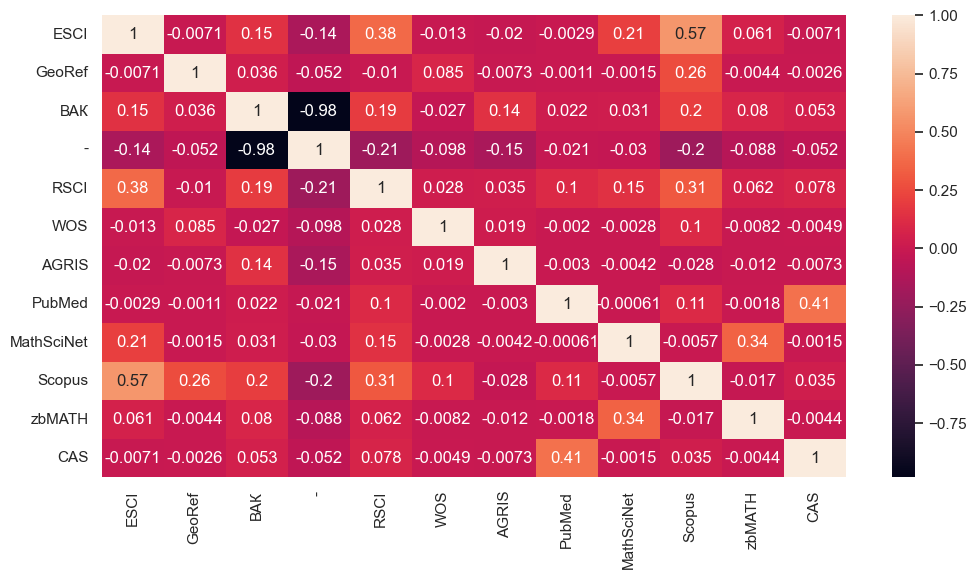

In [28]:
sns.set(rc={'figure.figsize':(12,6)})
sns.heatmap(for_heatmap.corr(), annot=True)

Есть очень высокая отрицательная корреляция между ВАК и прочерком, очень логично, публикаций уровня ВАК почти также много, как статей без указания уровня, и это является взаимоисключающим. 

Ещё есть высокая корреляция у Scopus и ESCI (0.57). Тоже легко объяснить, индекс цитирования ESCI доступен через Web of Science (которая по сути и является Scopus). 

Также коррелирует PubMed и CAS (0.41). PubMed - медицинский индекс цитирований, CAS - статей по химии.

MathSciNet и zbMath (0.34) явно статьи по математике.

В целом, всё достаточно предсказуемо.

#### Промежуточный вывод:
В первую попытку посмотреть на данные я парсила сайт киберленинки по предметной области по порядку, а статьи там автоматически сортируются в порядке убывания популярности. То есть мой датасет состоял из 2000 самых популярных статей, и это были достаточно старые статьи, т.к судя по всему на сайте не выдают бОльший вес новым статьям.

Более правильно было бы выкачать все статьи которые там есть, и потом делать обработку случайного N-ного количества статей для получения репрезентативной выборки. Или выбирать номер запарсенной страницы случайным образом.

Выбрала второй вариант, переделала работу. Качество данных стало значительно лучше. Скорее всего, в будущем расширю выборку до других областей знаний, не только раздел с компьюетрными науками.